# Hannah Byrne homework 5

In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1) Use Pandas’ read_csv function directly on this URL to open it as a DataFrame

In [142]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


## 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

In [144]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', parse_dates = [0])
df = df.set_index(['id'])

In [145]:
# displaying the updated df
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  object        
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


It seems that this is working

## 3) Use describe to get the basic statistics of all the columns

In [147]:
df.describe()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


In [148]:
print(f'The biggest earthquake has magnitude {df.describe()["mag"]["max"]} and the smallest has magnitude {df.describe()["mag"]["min"]} ')

The biggest earthquake has magnitude 8.2 and the smallest has magnitude -0.97 


## 4) Use nlargest to get the top 20 earthquakes by magnitude

In [149]:
df.nlargest(20, 'mag')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


Looking at the place column, it seems that state and country information are in there separated by a comma, so I would assume that we would use the comma to separate them.

## 5) Extract the state / country information from the place column

Note that I am assuming that the last command (to find the 20 largest earthquakes) did not require saving that into a new dataframe and working just from that subset. As such, I am continuing to use the full dataframe  

In [150]:
# creating a new column called country and adding in the states or countries into this column
df['country'] = df.place.str.split(',').str[1]

df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake,Alaska
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake,California


## 6) Display each unique value from the new column

In [151]:
countriesUnique = df.country.unique()

countriesUnique

array([' Alaska', ' Nevada', ' Mexico', ' California',
       ' Papua New Guinea', ' New Zealand', ' Missouri', nan, ' Montana',
       ' British Virgin Islands', ' Washington', ' Oregon', ' Canada',
       ' Fiji', ' Antarctica', ' Chile', ' Utah', ' Indonesia',
       ' Solomon Islands', ' Micronesia', ' Oklahoma', ' Hawaii',
       ' Wyoming', ' Russia', ' Arizona', ' Philippines', ' Bolivia',
       ' Greece', ' Japan', ' Puerto Rico', ' Iran', ' Tonga',
       ' Wallis and Futuna', ' Colorado', ' Guam', ' CA', ' Idaho',
       ' Pakistan', ' Burma', ' China', ' Peru', ' Costa Rica',
       ' East Timor', ' Japan region', ' Northern Mariana Islands',
       ' El Salvador', ' Samoa', ' Taiwan', ' Arkansas',
       ' South Sandwich Islands', ' Colombia', ' Dominican Republic',
       ' Argentina', ' Texas', ' New Hampshire', ' Saint Helena',
       ' Tanzania', ' Vanuatu', ' Bosnia and Herzegovina', ' India',
       ' American Samoa', ' Tennessee', ' Kentucky', ' Serbia',
       ' Ni

Note that I recognise that there are NaNs in there, as well as a comma value. Unclear if I should be removing those.

## 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [152]:
threshold = 4

# have to find the rows where the mag is greater than 4 by creating a mask
bigQuakes = df[df['mag'] >= threshold]

bigQuakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,NaN
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines


## 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

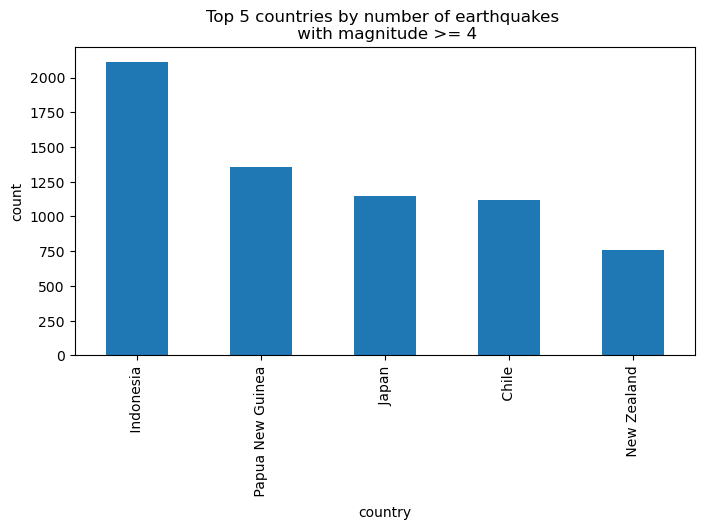

In [153]:
# using the GroupBy function
dispNum = 5

fig, ax = plt.subplots(figsize = (8,4))
ax.set_title('Top 5 countries by number of earthquakes \n with magnitude >= 4')
bigQuakes.groupby('country').mag.count().nlargest(dispNum).plot(kind = 'bar')
ax.set_ylabel('count')

plt.show()

### Completed in a more manual way as we have not covered GroupBy yet

Text(0, 0.5, 'count')

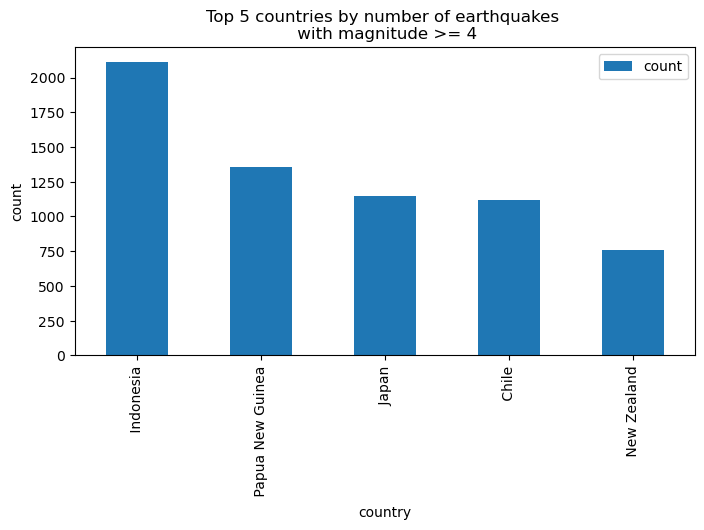

In [154]:
# first create a list of counts for each country
counts = bigQuakes['country'].value_counts()

# create a dataframe from this
dfCounts = pd.DataFrame(counts, index = countries)

# get the 5 largest
dfLargest = dfCounts.nlargest(dispNum, 'count')

# plot it
fig, ax = plt.subplots(figsize = (8,4))
ax.set_title('Top 5 countries by number of earthquakes \n with magnitude >= 4')
dfLargest.plot(kind = 'bar', ax = ax)
ax.set_ylabel('count')

## 9) Make a histogram the distribution of the Earthquake magnitudes

Note that I elected to have them share a y axis, so that it was easier to compare between the two of them

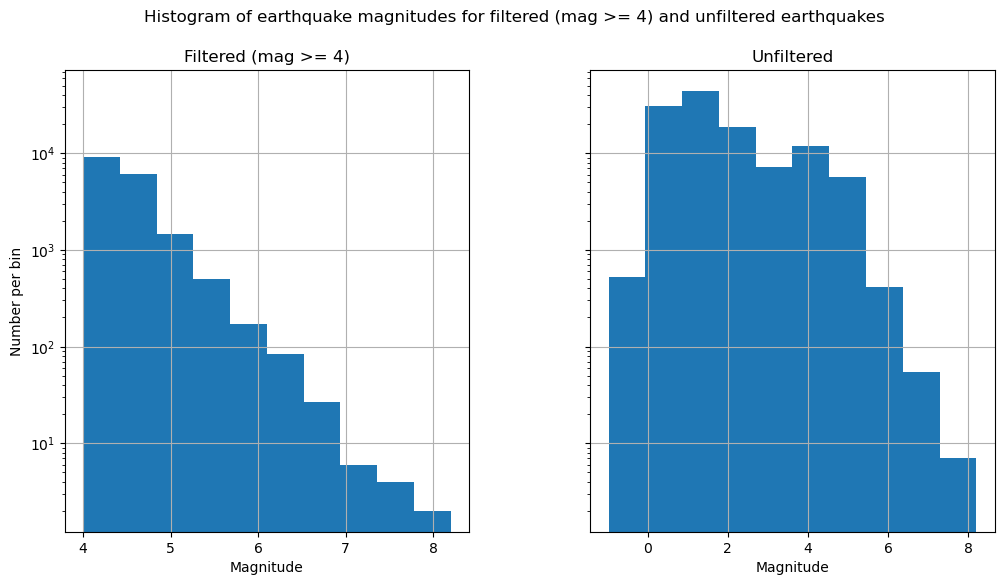

In [155]:
# doing one subplot for the filtered data and one for the unfiltered data

fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6), sharey = True)
fig.suptitle('Histogram of earthquake magnitudes for filtered (mag >= 4) and unfiltered earthquakes')

# doing the filtered one
bigQuakes.hist(column = 'mag', ax = axes[0], log = True)
axes[0].set_title('Filtered (mag >= 4)')
axes[0].set_xlabel('Magnitude')
axes[0].set_ylabel('Number per bin')

# doing for the unfiltered one
df.hist(column = 'mag', ax = axes[1], log = True)
axes[1].set_title('Unfiltered')
axes[1].set_xlabel('Magnitude')

plt.show()

From the filtered dataset in particular, we see that there's an inverse logarithmic relationship between the magnitude of the earthquake and the number of earthquakes occurring (i.e., larger earthquakes are more rare and the relationship appears almost linear when viewed in log(number) space). The unfiltered dataset shows that this relationship doesn't necessarily hold throughout the magnitude spectrum: smaller earthquakes (i.e., magnitude < 0) occur less frequently than those with magnitude between 0 and 2. There is another peak in occurrence around magnitude 4. From these plots, I understand that the relationahip between magnitude and occurrence is complex over the full spectrum of earthquake sizes but appears more coherent when looking specifically at earthquakes with magnitude >= 4.

## 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

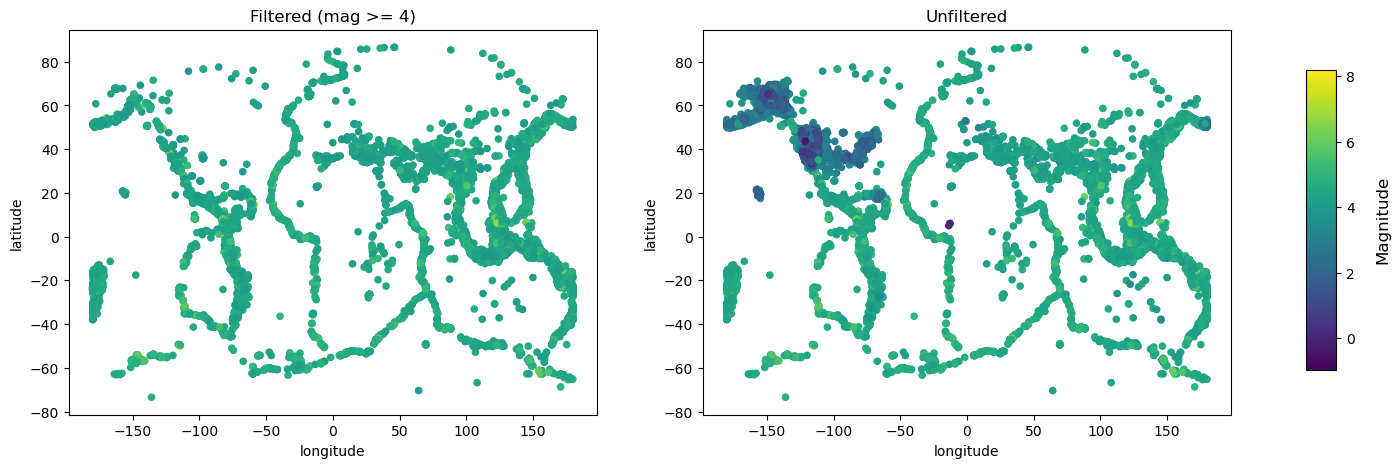

In [156]:
fig, axes = plt.subplots(ncols = 2, nrows = 1, figsize = (15, 5))

# making it possible to have one colourbar so that it's easier to compare the two plots
import matplotlib.colors as mcolors
import matplotlib.cm as cm
cmap = 'viridis'
norm = mcolors.Normalize(vmin = df.mag.min(), vmax = df.mag.max())

# plotting the filtered data
bigQuakes.plot('longitude', 'latitude', 
               kind =  'scatter', 
               c = 'mag',
               ax = axes[0],
               norm = norm,
               cmap = cmap,
               colorbar = False)

axes[0].set_title('Filtered (mag >= 4)')

# plotting the unfiltered data
df.plot('longitude', 'latitude', 
        kind = 'scatter', 
        c = 'mag',
        ax = axes[1],
        norm = norm,
        cmap = cmap,
        colorbar = False)

axes[1].set_title('Unfiltered')

# adding in the colour bar
cbarAx = fig.add_axes([0.95, 0.2, 0.02, 0.6])
colorBar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap = cmap), cax = cbarAx)
colorBar.set_label('Magnitude', rotation = 90, labelpad = 15, fontsize = 12)

I was actually surprised that the two datasets don't look very different apart from in North America, where there are several small (i.e., magnitude < 4) earthquakes that don't appear in the filtered map. This makes me think that either that plate boundary is unusual in its capacity to generate small earthquakes, or that North America has unusual capacity to detect earthquakes of that size.